<a href="https://colab.research.google.com/github/Roxana2125128/Inteligencia-Artificial/blob/main/Assignment7_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7.- Convolutional Neural Network.**

Roxana Pamela Martínez Córdova

Class Day: Thursday

Hour: N4-N6

# **1. Load libraries**

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# **2. Load data**

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **3. Data preprocessing**

In [3]:
# Data preprocessing
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# **4. Model selection and Training**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 131ms/step - accuracy: 0.8063 - loss: 0.6447 - val_accuracy: 0.9671 - val_loss: 0.1056
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 139ms/step - accuracy: 0.9749 - loss: 0.0804 - val_accuracy: 0.9842 - val_loss: 0.0563
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.9839 - loss: 0.0495 - val_accuracy: 0.9825 - val_loss: 0.0596
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 130ms/step - accuracy: 0.9871 - loss: 0.0404 - val_accuracy: 0.9868 - val_loss: 0.0450
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9871 - val_loss: 0.0479
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - accuracy: 0.9906 - loss: 0.0274 - val_accuracy: 0.9880 - val_loss: 0.0404
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.9932 - loss: 0.0220 - val_accuracy: 0.9871 - val_loss: 0.0470
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.9952 - loss: 0.0164 - 

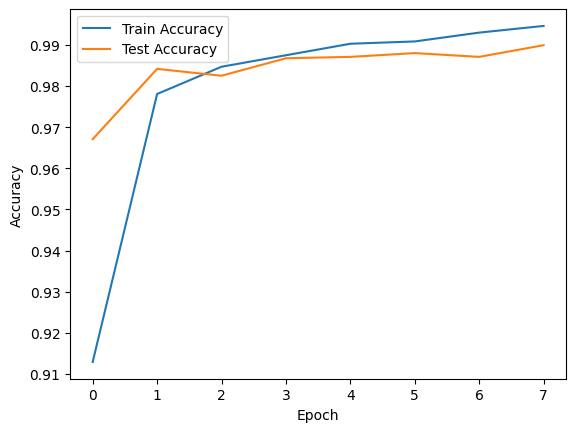

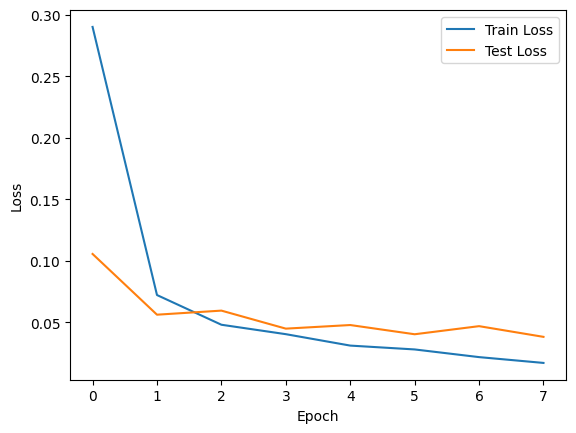

In [4]:
# Model selection and training
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=128, validation_split=0.2)

# Plotting train and test accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting train and test loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **5. Model testing**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9886 - loss: 0.0343
Test Accuracy: 0.9908000230789185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Prediction: 4
Actual Value: 4


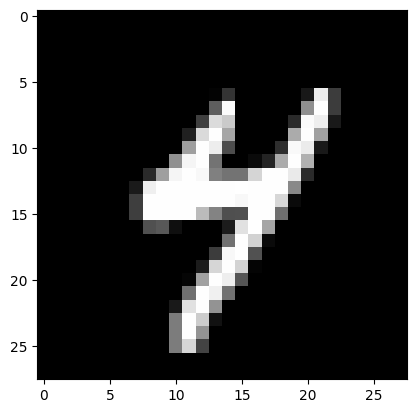

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: 5
Actual Value: 5


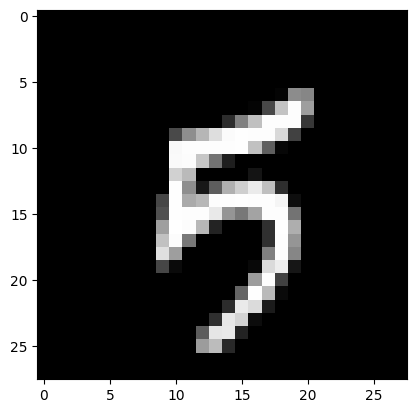

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction: 3
Actual Value: 3


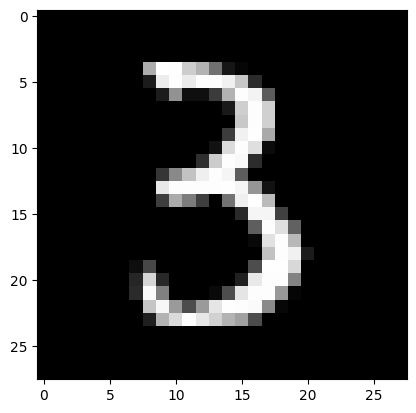

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: 5
Actual Value: 5


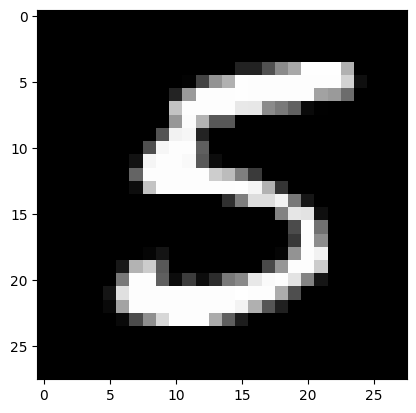

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: 5
Actual Value: 5


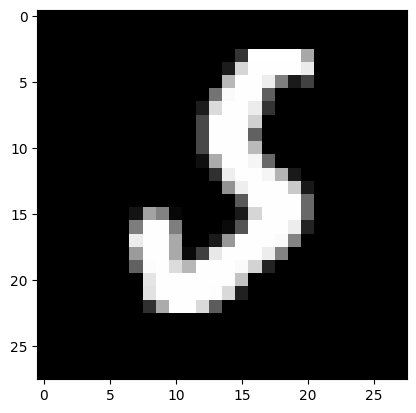

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


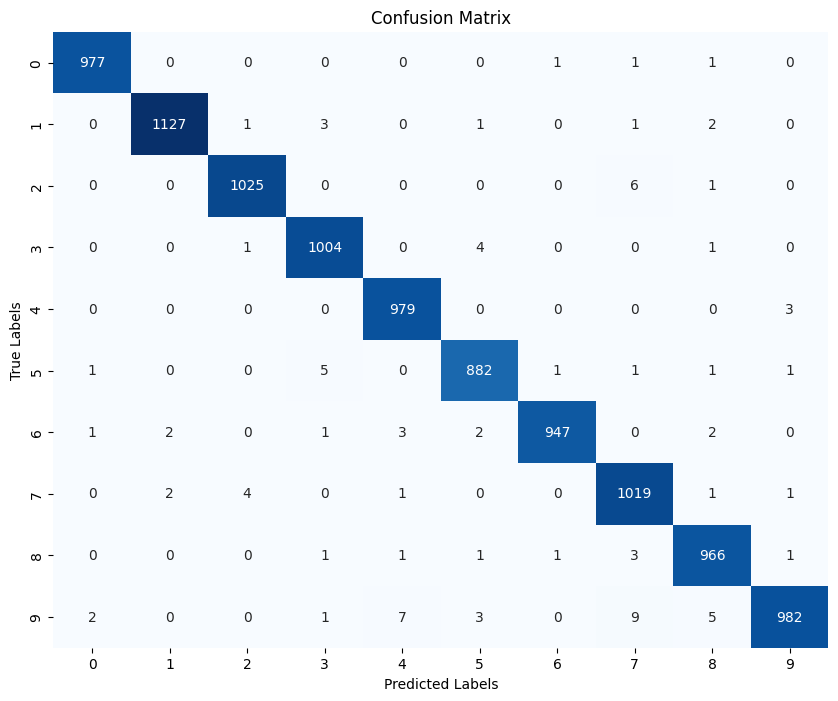

In [5]:
# Model testing
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)

# Perform 5 different predictions
for _ in range(5):
    # Choose a random index from the test dataset
    idx = np.random.randint(0, len(test_data))
    # Make prediction
    predicted_label = np.argmax(model.predict(test_data[idx:idx+1]))
    # Display prediction and actual value
    print("Prediction:", predicted_label)
    print("Actual Value:", np.argmax(test_labels[idx]))
    # Plot the image
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Confusion Matrix
predicted_labels = np.argmax(model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()